<h2>1. Introdução</h2>

O desenvolvimento deste projeto foi motivado pela necessidade de recolher insights sobre o jogo Valorant. À medida que a popularidade dos jogos cresce e os cenários se tornam mais competitivos, reconhecemos a oportunidade de analisar muitos aspectos diferentes do jogo, incluindo a seleção de agentes, a dinâmica do jogo em diferentes mapas e o desempenho dos jogadores em competições internacionais. Este documento descreve um plano para atingir esses objetivos dentro de um escopo definido.

<h3>1.1 Objetivo Geral</h3>

<ul><li>Levantar insights sobre o valorant a partir dos dados do Valorant Champions Tour</li></ul>

<h3>1.2 Objetivos Especificos</h3>

<ul>
<li>Analisar a evolução das preferências de agentes ao longo do tempo e identificar tendências de popularidade.</li>
<li>Calcular a distribuição percentual de vitórias na defesa e no ataque para cada mapa</li>
<li>Identificar o jogador com melhor desempenho geral, levando em consideração seu impacto nas partidas e contribuição para o sucesso da equipe.</li>
<li>Comparar a eficácia das equipes brasileiras em nos campeonatos internacionais</li>
</ul>

<h3>1.3 Perguntas a Serem Respondidas</h3>
<ol>
<li>Quais agentes estão sendo escolhidos com mais frequência ao longo do tempo?</li>
<li>Qual é a distribuição percentual de vitórias na defesa e no ataque nos mapas jogados?</li>
<li>Qual o melhor jogador de valorant nos campeonatos internacionais durantes os anos?</li>
<li>Qual o desempenho dos times brasileiros nos campeonatos internacionais durantes os anos?</li>
</ol>

<h3>1.4 Bibliotecas utilizadas:</h3>

As bibliotecas utilizadas estão contidas no arquivo requirements.txt no diretorio do presente trabalho.


>pip install -r requirements.txt

<br>
<h2>2. Palavras-chave</h2>

<br>
<h2>3. Desenvolvimento</h2>
<h3>3.1 Importando Bibliotecas</h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans
from scipy.stats import linregress
from sklearn.preprocessing import LabelEncoder
import funcoes as func
import numpy as np

# Remoção apenas para fins estéticos do Notebook
import warnings
warnings.filterwarnings('ignore')

<h3>3.2 Importantos os datasets</h3>

Os datatasets importados são filtros dos datasets ultlizados para análise de dados, o arquivo onde se localiza os filtros:

&emsp;<a href='vct_2021.ipynb' style='color: red;'>VCT 2021</a>
&emsp;<a href='vct_2022.ipynb' style='color: red;'>VCT 2022</a>
&emsp;<a href='vct_2023.ipynb' style='color: red;'>VCT 2023</a>



<h4>3.2.1 Importando os datasets separados</h4>

In [2]:
agents_vct2021 = pd.read_csv('datasets-criados/agents_pick_vct2021.csv')
agents_vct2022 = pd.read_csv('datasets-criados/agents_pick_vct2022.csv')
agents_vct2023 = pd.read_csv('datasets-criados/agents_pick_vct2023.csv')

maps_vct2021 = pd.read_csv('datasets-criados/maps_vct2021.csv')
maps_vct2022 = pd.read_csv('datasets-criados/maps_vct2022.csv')
maps_vct2023 = pd.read_csv('datasets-criados/maps_vct2023.csv')

best_player_vct2021 = pd.read_csv('datasets-criados/best_player_vct2021.csv')
best_player_vct2022 = pd.read_csv('datasets-criados/best_player_vct2022.csv')
best_player_vct2023 = pd.read_csv('datasets-criados/best_player_vct2023.csv')

overview2021 = pd.read_csv("dataset/vct_2021/matches/overview.csv")
overview2022 = pd.read_csv("dataset/vct_2022/matches/overview.csv")
overview2023 = pd.read_csv("dataset/vct_2023/matches/overview.csv")

agents_vct = pd.concat([agents_vct2021, agents_vct2022, agents_vct2023])
maps_vct = pd.concat([maps_vct2021, maps_vct2022, maps_vct2023])



In [3]:
personalizado_paleta = ['#1f77b4', '#ff7f0e', '#666666']

<br>
<h2>4. Visualização de dados</h2>

<h3>4.1 Escolha dos agentes</h3>

<h4>4.1.1 Quais agentes estão sendo escolhidos com mais frequência ao longo do tempo?</h4>

In [4]:
'''agents = agents_vct['Agent'].unique()
for i in agents:
    print('\n',i,'\n')
    print(func.descricao_tabela(agents_vct,'Agent',i))'''

"agents = agents_vct['Agent'].unique()\nfor i in agents:\n    print('\n',i,'\n')\n    print(func.descricao_tabela(agents_vct,'Agent',i))"

<h4>4.1.2 Boxplot da porcentagem de escolha dos agentes</h4>

O boxplot a seguir exibe dados sobre os agentes ao longo dos anos de 2021, 2022 e 2023.

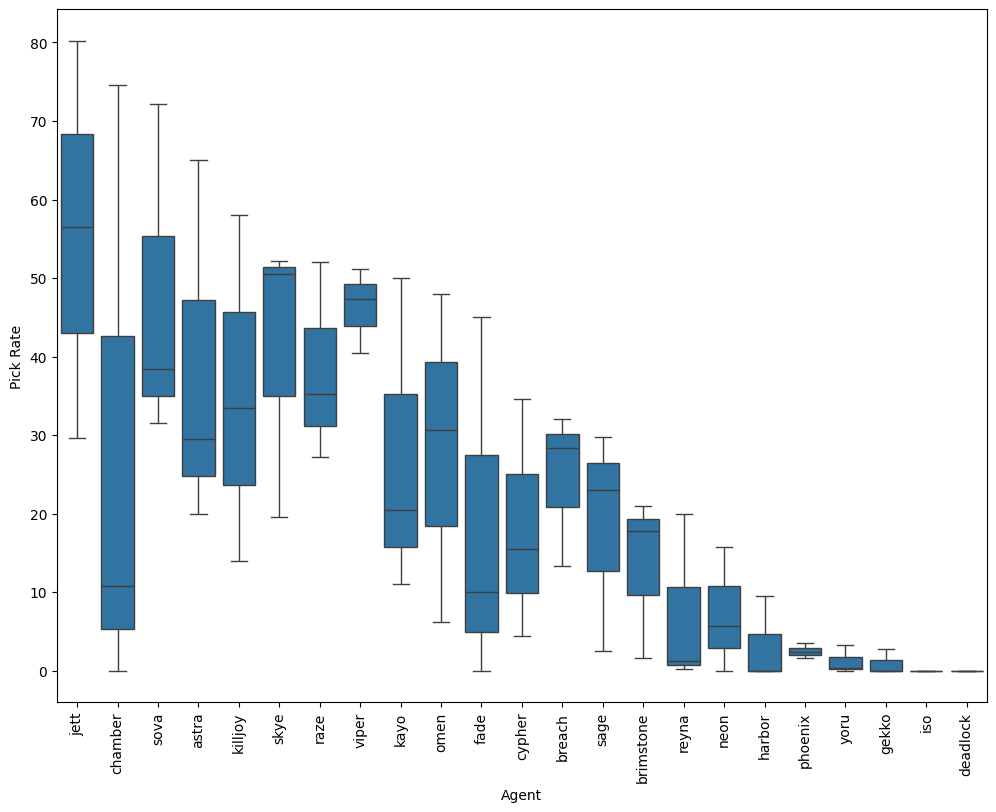

In [5]:
#Plotando o gráfico de colunas
plt.figure(figsize=(12, 9))
sns.boxplot(x='Agent', y='Pick Rate', data=agents_vct, order=agents_vct.sort_values('Pick Rate', ascending=False)['Agent'])
plt.xticks(rotation=90)
plt.show()

<h3>4.2 Anialise das vitórias</h3>

<h4>4.2.1 Qual é a distribuição percentual de vitórias na defesa e no ataque nos mapas jogados?</h4>

In [6]:
'''maps = maps_vct['Map'].unique()
for i in maps:
    print('\n',i,'\n')
    print(func.descricao_tabela(maps_vct,'Map',i))'''

"maps = maps_vct['Map'].unique()\nfor i in maps:\n    print('\n',i,'\n')\n    print(func.descricao_tabela(maps_vct,'Map',i))"

<h4>4.2.2 Boxplot da porcentagem de vitórias no lado atacante</h4>

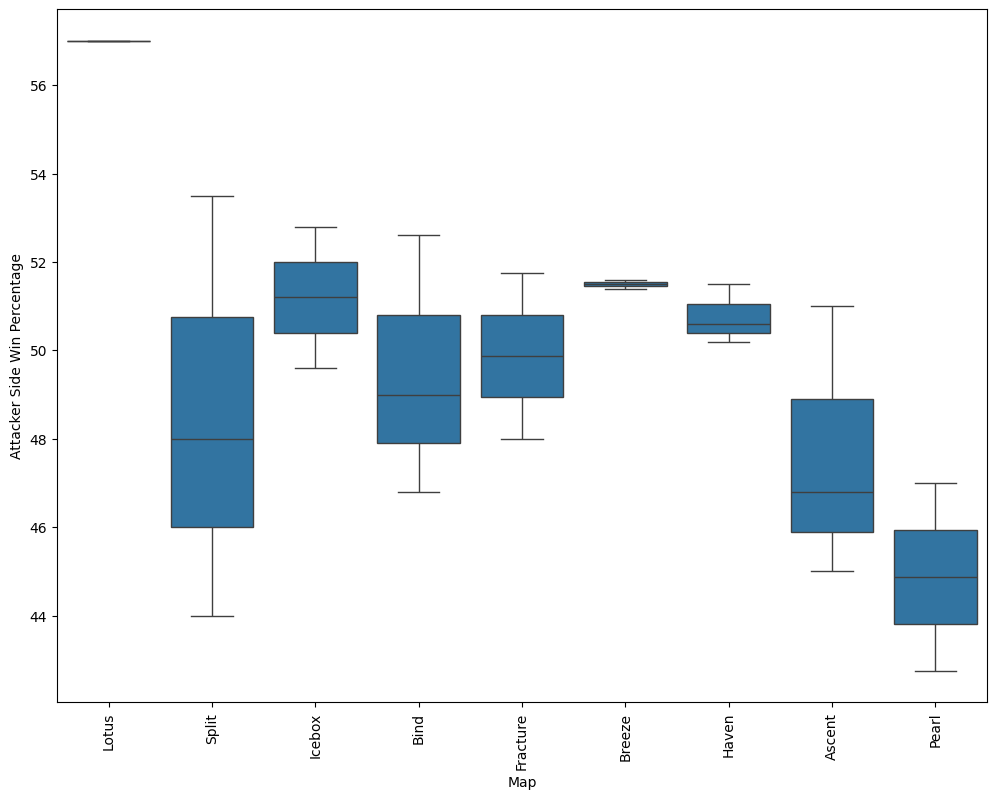

In [7]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='Map', y='Attacker Side Win Percentage', data = maps_vct, order = maps_vct.sort_values('Attacker Side Win Percentage', ascending=False,)['Map'], color= personalizado_paleta[0])
plt.xticks(rotation=90)
plt.show()

<h4>4.2.3 Boxplot da porcentagem de vitórias no lado defensor</h4>

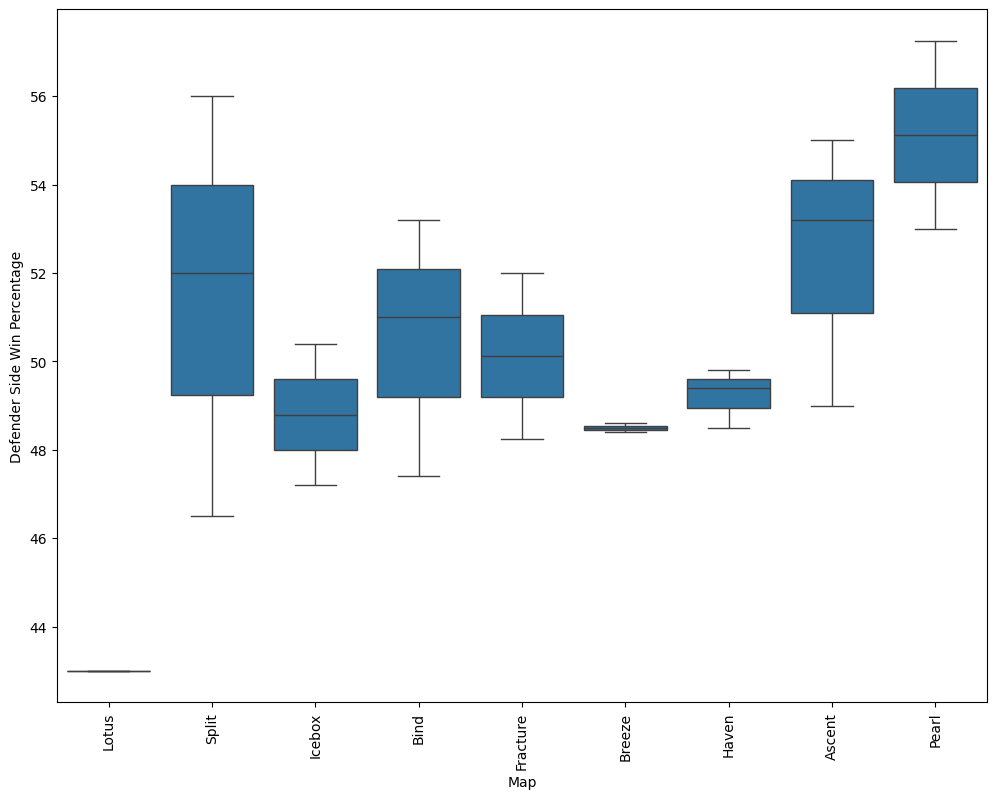

In [8]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='Map', y='Defender Side Win Percentage', data=maps_vct, order=maps_vct.sort_values('Attacker Side Win Percentage', ascending=False)['Map'], color=personalizado_paleta[0])
plt.xticks(rotation=90)
plt.show()

<br>
<h2>5. Visualização dos dados</h2>

<h3>5.1 Porcentagem de vitórias</h3>

A visualização do gráfico a seguir permite observar a porcentagem de vitórias pelo lado atacante e pelo lado defensor nos mapas jogados competitivamente no Valorant Champions Tour (VCT) ao longo dos anos de 2021, 2022 e 2023.

In [9]:
maps_vct_2_years= pd.merge(maps_vct2021, maps_vct2022, on='Map', how='outer')

maps_vct_total = pd.merge (maps_vct_2_years, maps_vct2023, on='Map', how='outer')

maps_vct_total = maps_vct_total.fillna(0, inplace=False)


In [10]:
maps_vct_total = func.mediaMap(maps_vct_total)

maps_vct_total


,Map,Attacker Side Win Percentage_x,Defender Side Win Percentage_x,Attacker Side Win Percentage_y,Defender Side Win Percentage_y,Attacker Side Win Percentage,Defender Side Win Percentage
0,Ascent,46.8,53.2,45.0,55.0,51.00,49.00
1,Bind,46.8,53.2,52.6,47.4,49.00,51.00
2,Breeze,51.6,48.4,51.4,48.6,51.50,48.50
3,Fracture,49.9,50.1,48.0,52.0,51.75,48.25
4,Haven,50.6,49.4,50.2,49.8,51.50,48.50
5,Icebox,52.8,47.2,49.6,50.4,51.20,48.80
6,Lotus,57.0,43.0,57.0,43.0,57.00,43.00
7,Pearl,44.9,55.1,47.0,53.0,42.75,57.25
8,Split,44.0,56.0,48.0,52.0,53.50,46.50


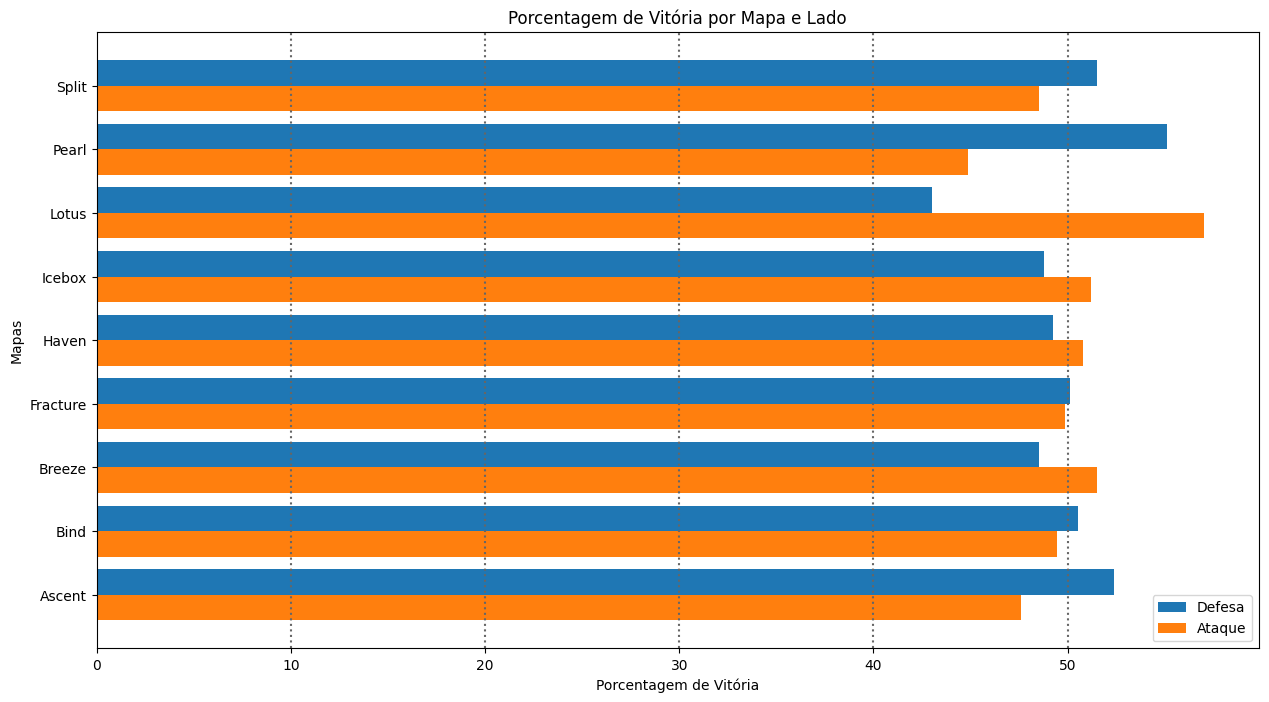

In [11]:
maps_vct_total['Total Attacker Side Win Percentage'] = maps_vct_total[['Attacker Side Win Percentage_x', 'Attacker Side Win Percentage_y', 'Attacker Side Win Percentage']].mean(axis=1).round(2)

maps_vct_total['Total Defender Side Win Percentage'] = maps_vct_total[['Defender Side Win Percentage_x', 'Defender Side Win Percentage_y', 'Defender Side Win Percentage']].mean(axis=1).round(2)


maps_vct_final =  pd.concat([maps_vct_total['Map'], maps_vct_total['Total Attacker Side Win Percentage'], maps_vct_total ['Total Defender Side Win Percentage']], axis=1)

maps_vct_final = maps_vct_final.fillna(0, inplace=False)

#maps_vct_final
func.mostraGraficoMap(maps_vct_final)

Ao visualizar o gráfico, é possível observar que no mapa "Lotus", as vitórias são mais prováveis quando se está do lado do ataque, enquanto no mapa "Perl" a vantagem está do lado da defesa, assim como no mapa "Ascent". Nos outros mapas, no entanto, as porcentagens não variam muito, com as vitórias ficando quase empatadas entre os lados atacante e defensor.

<h3>5.2 Escolha dos agentes</h3>

<h4>5.2.1 Agentes escolhidos no anos de 2021, 2022 e 2023</h4> 

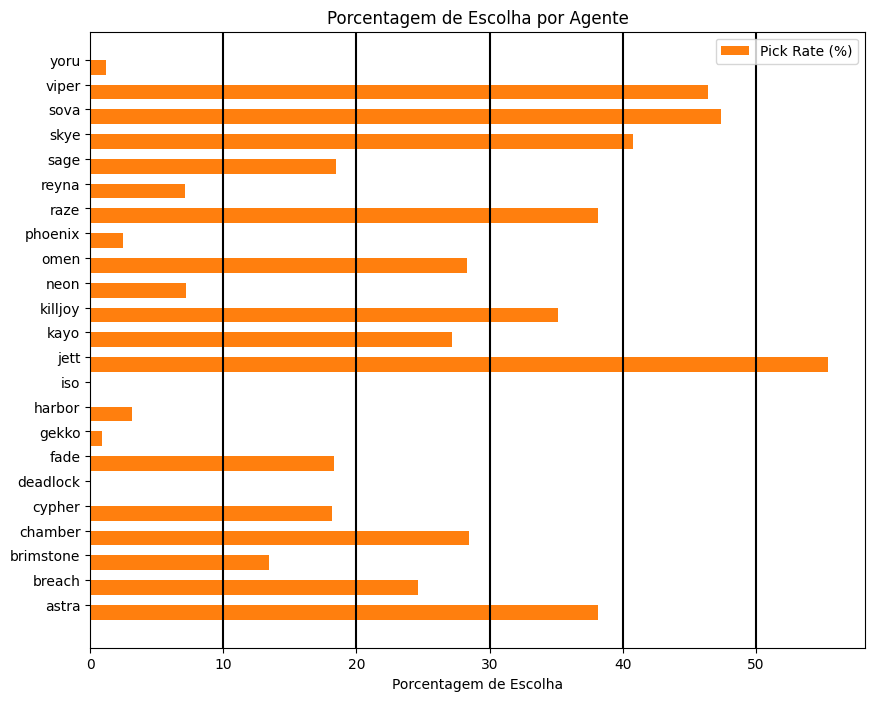

In [12]:
df_joined = pd.merge(agents_vct2021, agents_vct2022, on='Agent', how='outer')
agente_joined = pd.merge(df_joined, agents_vct2023, on='Agent', how='outer')

agente_joined['Pick Rate (%)'] = agente_joined[['Pick Rate_x', 'Pick Rate_y', 'Pick Rate']].mean(axis=1).round(2)
nova_tabela_agent = pd.concat([agente_joined['Agent'], agente_joined['Pick Rate (%)']], axis=1)

#nova_tabela_agent
func.mostraGraficoAgent(nova_tabela_agent)

O gráfico mostra a porcentagem geral de escolha dos agentes no Valorant Champions Tour (VCT) no periodo dado. Ao analisar o gráfico, percebemos a alta taxa de escolha dos agentes "Jett", "Viper" e "Sova". Esses agentes são bastante importantes nas composições por mapas, já que a Jett desempenha o papel de duelista, a Viper é uma controladora e o Sova é um iniciador. Essa composição é completa e funciona em quase todos os mapas do jogo.

Alguns agentes, como Yoru, Reyna e Phoenix, possuem uma taxa de escolha baixa devido às suas habilidades que não são tão eficazes para trabalhar em equipe. Esses agentes são mais voltados para um estilo de jogo individual, por isso não são tão escolhidos no cenário competitivo.

Agentes como Iso, Harbor, Gekko e Deadlock não são tão escolhidos porque são agentes novos lançados entre 2022 e 2023, e ainda não foram utilizados competitivamente. Por isso, as porcentagens de escolha para esses agentes são baixas ou até mesmo nulas.

<img src="assets/img-agents/jett.jpg" alt="Minha Imagem">

<h4>5.2.2 Agentes escolhidos em cada ano</h4> 

Análise feita em cada ano do VCT a fim de demonstrar as mudanças nas escolhas dos agentes.

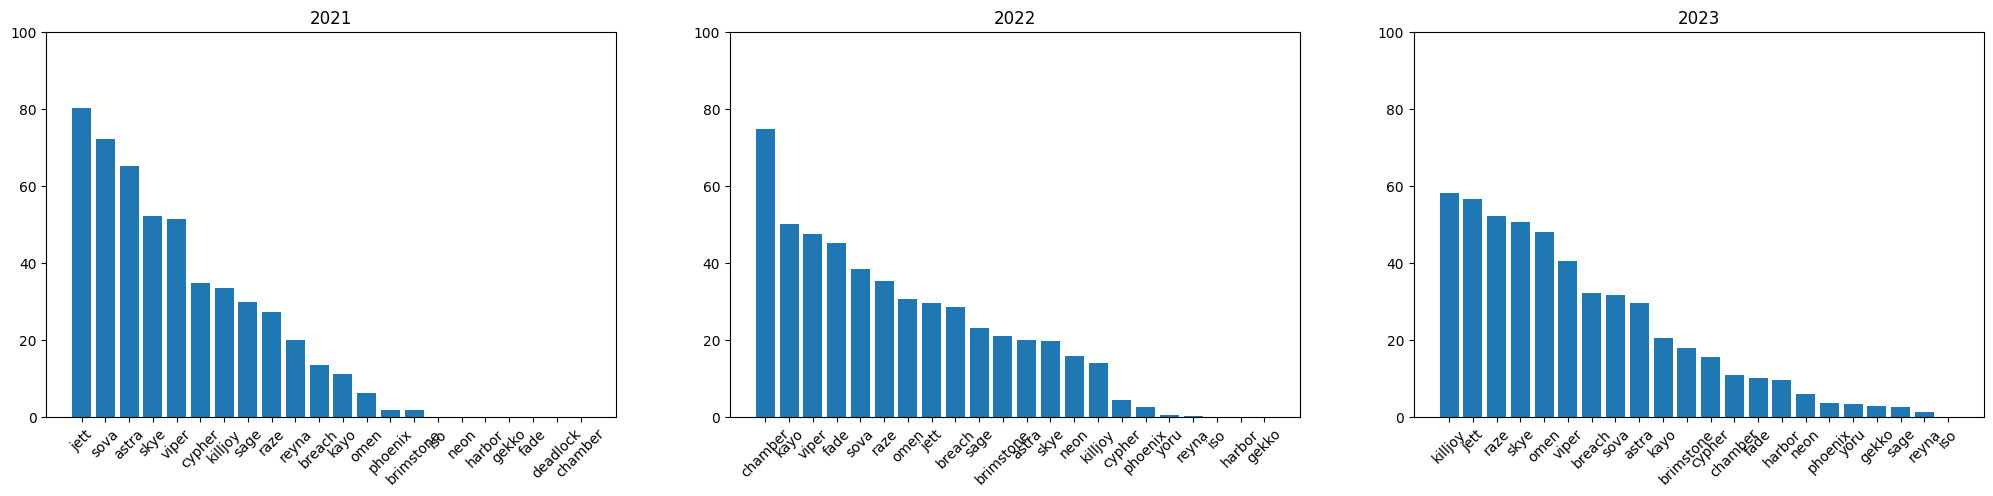

In [13]:
sns.set_palette(personalizado_paleta)

fig, axs = plt.subplots(1, 3, figsize=(25, 5))

agents_vct2021_ord = func.agentsYear(agents_vct2021, 2021)
axs[0].bar(agents_vct2021_ord["Agent"], agents_vct2021_ord["Pick Rate"])
axs[0].set_ylim(0, 100)
axs[0].set_title('2021')
axs[0].tick_params(axis='x', rotation=45) 

agents_vct2022_ord = func.agentsYear(agents_vct2022, 2022)
axs[1].bar(agents_vct2022_ord["Agent"], agents_vct2022_ord["Pick Rate"])
axs[1].set_ylim(0, 100)
axs[1].set_title('2022')
axs[1].tick_params(axis='x', rotation=45)  

agents_vct2023_ord = func.agentsYear(agents_vct2023, 2023)
axs[2].bar(agents_vct2023_ord["Agent"], agents_vct2023_ord["Pick Rate"])
axs[2].set_ylim(0, 100)
axs[2].set_title('2023')
axs[2].tick_params(axis='x', rotation=45) 

plt.show()


Visualizando os gráficos das escolhas dos agentes durante o Valorant Champions Tour (VCT) ao longo dos anos de 2021 a 2023, podemos perceber a variação do meta no jogo, ou seja, os agentes mais frequentemente escolhidos. Em 2021, o agente Chamber ainda não havia sido lançado, portanto sua porcentagem era nula. Já em 2022, ele subiu rapidamente do último para o primeiro lugar, devido às suas habilidades serem muito eficazes para a defesa, sendo sua especialidade como sentinela. No entanto, em 2023, ele sofreu uma queda drástica devido aos nerfs que suas habilidades receberam. Com isso, podemos concluir que o meta das escolhas dos agentes está em constante mudança, seja por buffs ou nerfs.

<h4>5.2.3 Comparação das escolhas nos três anos</h4>

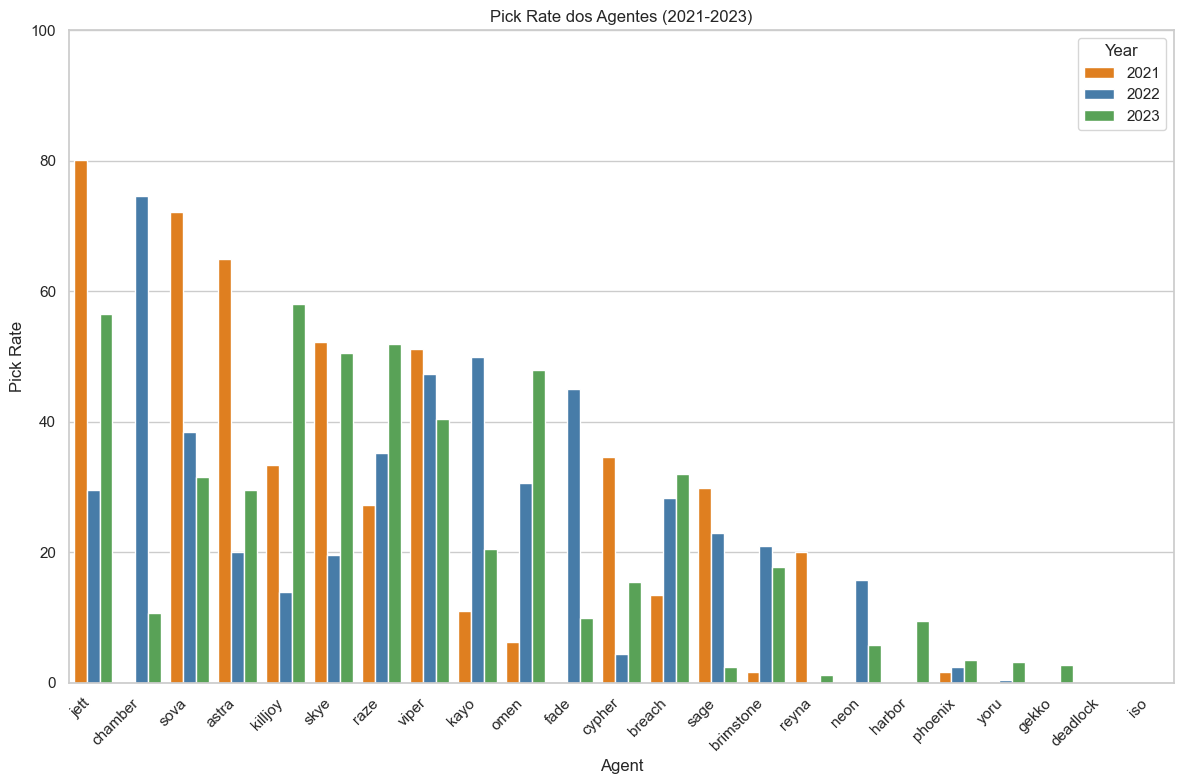

In [32]:
agents_vct_ord = pd.concat([agents_vct2021_ord, agents_vct2022_ord, agents_vct2023_ord], axis=0)

agents_vct_ord.sort_values(by="Pick Rate", ascending=False, inplace=True)

# Configurações para o gráfico de barras
plt.figure(figsize=(12, 8))

paleta_grafico = ['#FF7F00','#377EB8', '#4DAF4A']

# Cria o gráfico de barras com o DataFrame 'agents_vct_ord'
sns.barplot(data=agents_vct_ord, x="Agent", y="Pick Rate", hue="Year", palette='Set1')

plt.ylim(0, 100)  
plt.xticks(rotation=45, ha='right')  
plt.title('Pick Rate dos Agentes (2021-2023)')  
plt.tight_layout()  

# Exibe o gráfico
plt.show()

Neste gráfico, também estamos explorando a porcentagem de escolha dos agentes no VCT. Cada barra colorida representa a jornada de um agente específico, mostrando como sua porcentagem variou ao longo do tempo. À medida que navegamos pelo gráfico, notamos que alguns agentes têm uma presença constante, mantendo uma base sólida de escolha ao longo dos dos anos. Outros, por sua vez, têm picos de popularidade em determinados momentos, devido a atualizações de jogo, como já foi dito antes.

<h3>5.3 Combate x Partidas Jogadas</h3>

In [15]:
best_player_vct2021 = pd.read_csv('datasets-criados/best_player_vct2021.csv')
best_player_vct2022 = pd.read_csv('datasets-criados/best_player_vct2022.csv')
best_player_vct2023 = pd.read_csv('datasets-criados/best_player_vct2023.csv')

best_player_vct = pd.concat([best_player_vct2021, best_player_vct2022, best_player_vct2023], axis=0)

ordered_df = best_player_vct.sort_values(by=[col for col in best_player_vct2022.columns if 'mean' in col])

ordered_df

,Player,Kills,Kills Per Round,Average Damage Per Round,Headshot %,Kills:Deaths,Kills Mean,Kills Per Round Mean,Average Damage Per Round Mean,Headshot % Mean,Kills:Deaths Mean
0,Chronicle,590,0.900000,169.880000,28.2,1.592000,118.0,0.900000,169.880000,28.2,1.592000
0,yay,920,0.926667,156.400000,28.0,1.403333,184.0,0.926667,156.400000,28.0,1.403333
0,aspas,892,0.866667,153.833333,25.0,1.260000,178.4,0.866667,153.833333,25.0,1.260000


In [16]:
overview2021 = pd.read_csv("dataset/vct_2021/matches/overview.csv")
overview2022 = pd.read_csv("dataset/vct_2022/matches/overview.csv")
overview2023 = pd.read_csv("dataset/vct_2023/matches/overview.csv")

br_teams_2021 = ["FURIA", "Keyd Stars", "Team Vikings"]
br_teams_2022 = ["FURIA", "LOUD"]
br_teams_2023 = ["LOUD", "FURIA", "MIBR"]

br_acs2021 = func.acsOverview(br_teams_2021, overview2021)
br_acs2022 = func.acsOverview(br_teams_2022, overview2022)
br_acs2023 = func.acsOverview(br_teams_2023, overview2023)

br_acs = pd.concat([br_acs2021, br_acs2022, br_acs2023], axis=0)

br_acs

,Team,Matches Count,Mean ACS
0,FURIA,28,205.18
1,Keyd Stars,24,198.56
2,Team Vikings,32,202.01
0,FURIA,17,199.88
1,LOUD,20,216.63
0,LOUD,22,206.39
1,FURIA,13,193.63
2,MIBR,10,186.74


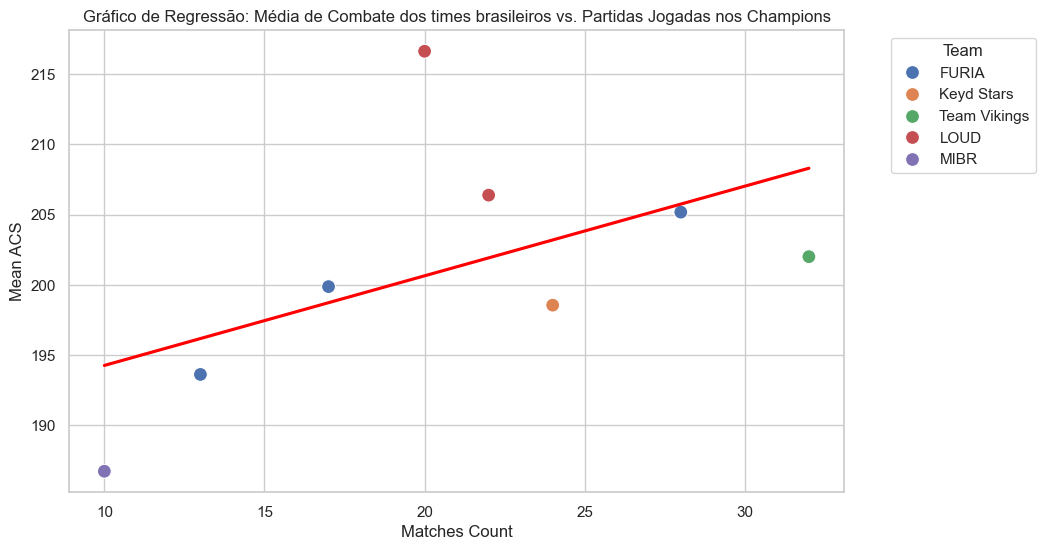

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(data=br_acs, x="Matches Count", y="Mean ACS", hue='Team', s=100)
regplot = sns.regplot(data=br_acs, x="Matches Count", y="Mean ACS", scatter=False, line_kws={"color": "red"}, ci=None)

plt.title('Gráfico de Regressão: Média de Combate dos times brasileiros vs. Partidas Jogadas nos Champions')
plt.xlabel('Matches Count')
plt.ylabel('Mean ACS')

plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<h2>6. Explorando Agrupamentos</h2>

In [18]:
ovw2021_group = overview2021[["Average Combat Score", "Average Damage per Round"]]
overview2021_group = ovw2021_group.dropna()

ovw2022_group = overview2022[["Average Combat Score", "Average Damage per Round"]]
overview2022_group = ovw2022_group.dropna()

ovw2023_group = overview2023[["Average Combat Score", "Average Damage per Round"]]
overview2023_group = ovw2023_group.dropna()

overview_group = pd.concat([overview2021_group, overview2022_group, overview2023_group], axis=0, ignore_index=True)

In [19]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(overview_group)



KMeans(n_clusters=3)

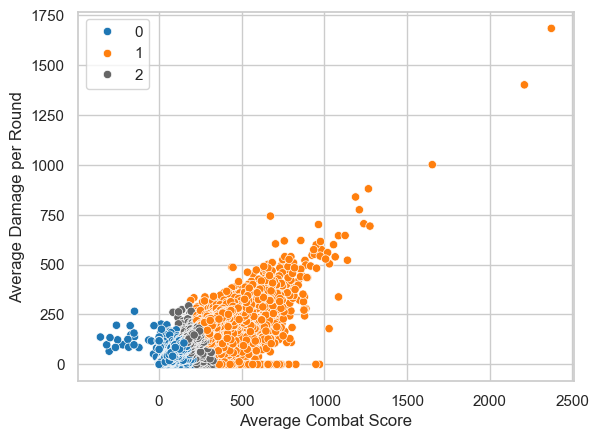

In [20]:
sns.scatterplot(data=overview_group, x="Average Combat Score", y="Average Damage per Round", hue=kmeans.labels_, palette= personalizado_paleta)

plt.show()

<h3>6.1 Questionamentos</h3>
<h4>6.1.1 Algum padrão foi detectado?</h4>

Sim, alguns padrões foram detectados. Percebe-se que em grande parte dos casos o aumento do dano médio por rodada (Average Damage per Round) está diretamente relacionado a pontuação média de combate (Average Combat Score). É notório também que a maioria dos dados estão centralizados em uma parte do gráfico, o que indica que a maior parte dos jogadore seguem um mesmo padrão. Também fica evidente que como os dados seguem um padrão, os pontos que possuem o Average Damage per Round igual a zero podem ser considerados outliers.


<h4>6.1.2 Alguma nova pergunta foi descoberta ao analisar os agrupamentos?</h4>

Sim, surgiu um novo questionamento. Será possível afirmar, a partir da análise dos agrupamentos e dos pontos, que a pontuação média de combate (Average Combat Score) é um fator determinante para o dano médio por rodada (Average Damage per Round) ou existem outros fatores que influenciam diretamente nesse resultado?